<a href="https://colab.research.google.com/github/FadyEhab-coder/ML-Projects/blob/main/Restarurent_Cuisine_Rating_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("surajjha101/cuisine-rating")

print("Path to dataset files:", path)

In [ ]:
import os

# List files in the downloaded directory
print(os.listdir(path))

In [ ]:
df = pd.read_csv(os.path.join(path, 'Cuisine_rating.csv'))
display(df.head())

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

# **Location** **Analysis**

In [ ]:
df['Location'].value_counts()

,count
Location,
"St. George,NY",46
"Upper East Side,NY",30
"Riverdale,NY",28
"Central Park,NY",24
"China Town, NY",22
"Market City, NY",20
"Upper West Side,NY",18
"Central Park,ny",8
"Market City, MY",2


In [ ]:
location_rating = df.groupby('Location')['Overall Rating'].mean().sort_values(ascending=False)
location_rating

,Overall Rating
Location,
"Market City, NY",3.725000
"Central Park,ny",3.687500
"Cedar Hill, NY",3.500000
"Central Park,NY",3.437500
"China Town, NY",3.159091
"Upper West Side,NY",3.138889
"St. George,NY",3.119565
"Riverdale,NY",3.053571
"Upper East Side,NY",3.016667


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Market City, NY'),
  Text(1, 0, 'Central Park,ny'),
  Text(2, 0, 'Cedar Hill, NY'),
  Text(3, 0, 'Central Park,NY'),
  Text(4, 0, 'China Town, NY'),
  Text(5, 0, 'Upper West Side,NY'),
  Text(6, 0, 'St. George,NY'),
  Text(7, 0, 'Riverdale,NY'),
  Text(8, 0, 'Upper East Side,NY'),
  Text(9, 0, 'Market City, MY')])

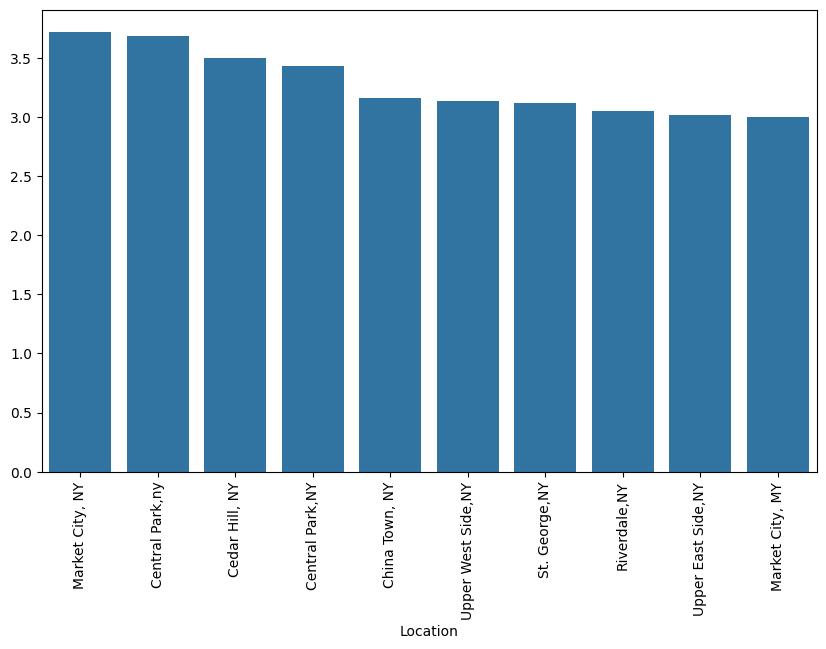

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=location_rating.index, y=location_rating.values)
plt.xticks(rotation=90)

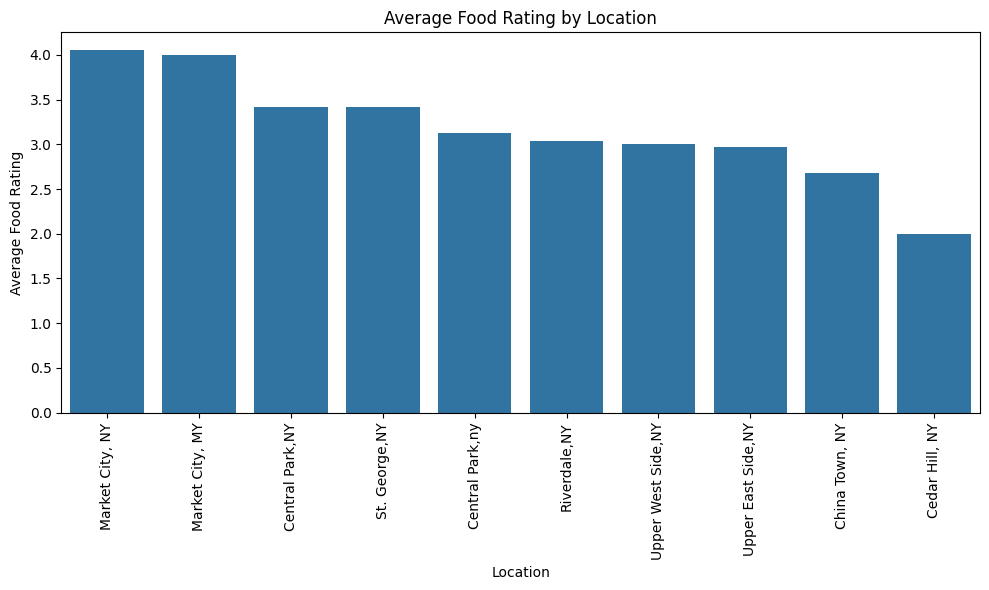

In [ ]:
food_rating_by_location = df.groupby('Location')['Food Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=food_rating_by_location.index, y=food_rating_by_location.values)
plt.title('Average Food Rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Food Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **User** **Analysis**

In [ ]:
gender_ratings = df.groupby('Gender')['Overall Rating'].mean().sort_values(ascending=False)
gender_ratings

,Overall Rating
Gender,
Female,3.335366
Male,3.148305


Text(0, 0.5, 'Average Rating')

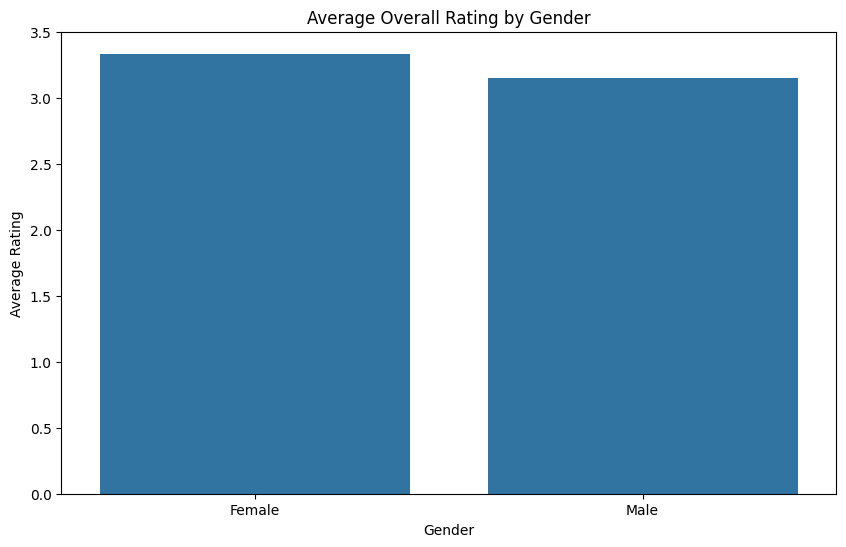

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_ratings.index, y=gender_ratings.values)
plt.title('Average Overall Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')

/tmp/ipython-input-25-540931974.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=trait, y=rating_col, palette='pastel')
/tmp/ipython-input-25-540931974.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=trait, y=rating_col, palette='pastel')
/tmp/ipython-input-25-540931974.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=trait, y=rating_col, palette='pastel')


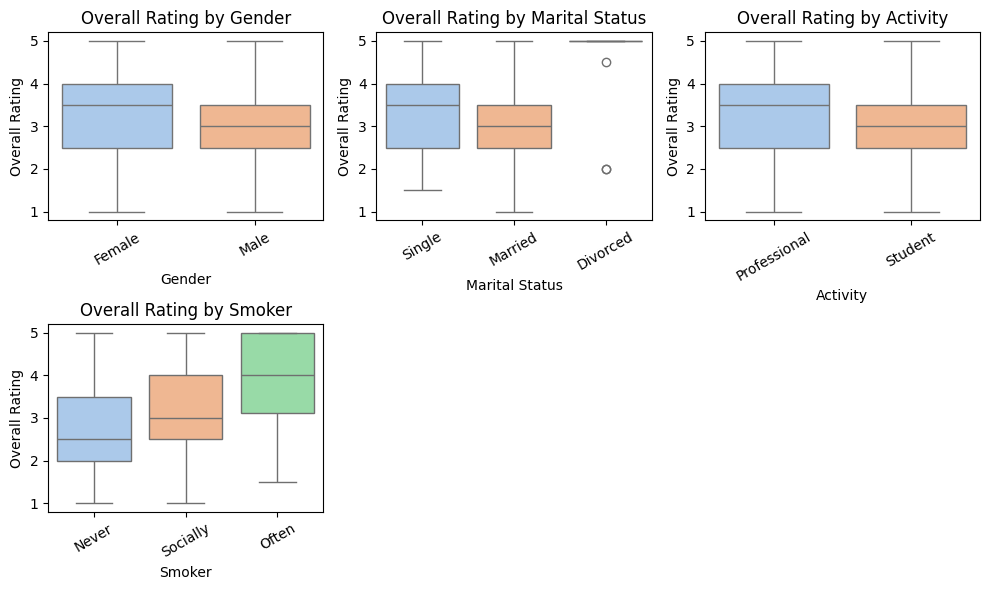

In [ ]:
traits = ['Gender', 'Marital Status', 'Activity','Smoker']
rating_col = 'Overall Rating'

plt.figure(figsize=(10, 6))
for i, trait in enumerate(traits):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=trait, y=rating_col, palette='pastel')
    plt.title(f'{rating_col} by {trait}')
    plt.xlabel(trait)
    plt.ylabel(rating_col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# **Cuisines** **Analysis**

In [ ]:
df.Cuisines.value_counts()

,count
Cuisines,
Japanese,36
French,34
Filipino,34
Indian,32
Chinese,24
Seafood,22
Italian,18


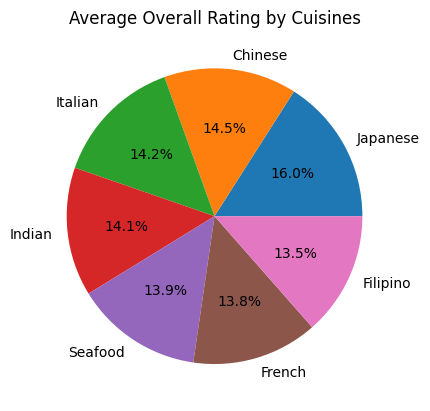

In [ ]:
cuisines_rating = df.groupby('Cuisines')['Overall Rating'].mean().sort_values(ascending=False)
cuisines_rating
plt.pie(cuisines_rating, labels=cuisines_rating.index, autopct='%1.1f%%')
plt.title('Average Overall Rating by Cuisines')
plt.show()

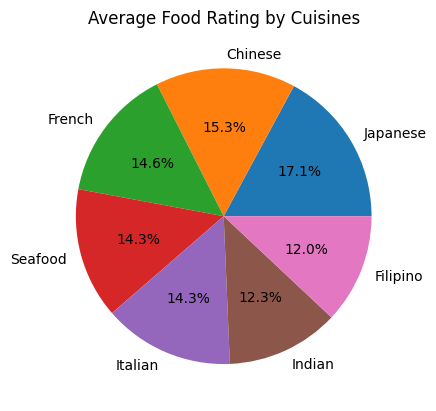

In [ ]:
cuisines_food_rating = df.groupby('Cuisines')['Food Rating'].mean().sort_values(ascending=False)
cuisines_food_rating
plt.pie(cuisines_food_rating, labels=cuisines_food_rating.index, autopct='%1.1f%%')
plt.title('Average Food Rating by Cuisines')
plt.show()

<Figure size 1200x600 with 0 Axes>

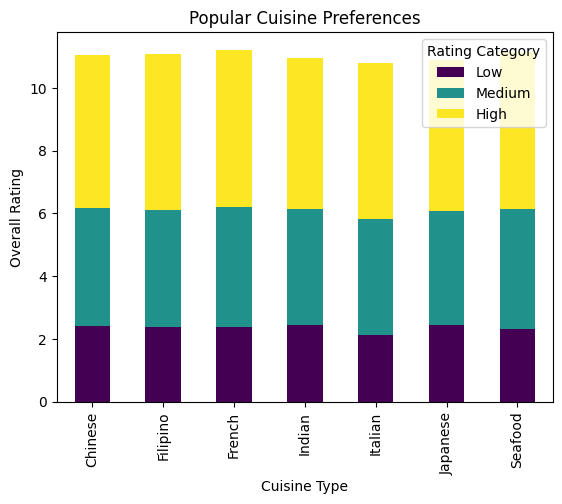

In [ ]:
bins = [0, 3, 4, 5]
labels = ['Low', 'Medium', 'High']
df['Rating Category'] = pd.cut(df['Overall Rating'], bins=bins, labels=labels, include_lowest=True)

grouped_data = df.groupby(['Cuisines', 'Rating Category'])['Overall Rating'].mean().unstack()


plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Popular Cuisine Preferences')
plt.xlabel('Cuisine Type')
plt.ylabel('Overall Rating')

plt.legend(title='Rating Category')

plt.show()
